In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import gc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import *
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder
from sklearn.decomposition import PCA,TruncatedSVD, NMF
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from itertools import product
from kmodes.kprototypes import KPrototypes
from sklearn import metrics
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics.cluster import adjusted_rand_score
import warnings
warnings.filterwarnings("ignore")
sns.set_palette("deep")

In [2]:
df = pd.read_csv("df_clean.csv")
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name_english', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'days_before_delivered', 'days_before_delivered_estimation', 'Recency',
       'Frequency', 'MonetaryValue', 'r_quartile', 'f_bins', 'm_quartile',
       

In [3]:
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].astype('datetime64')

In [4]:
df['order_purchase_timestamp'].describe()

count                   91461
unique                  91234
top       2018-04-11 10:48:14
freq                        3
first     2016-10-03 09:44:50
last      2018-08-29 15:00:37
Name: order_purchase_timestamp, dtype: object

In [5]:
df.set_index('customer_unique_id', inplace=True)

In [6]:
df.head(5)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,...,days_before_delivered,days_before_delivered_estimation,Recency,Frequency,MonetaryValue,r_quartile,f_bins,m_quartile,RFM_Score,rfm_segment_name
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,fadbb3709178fc513abc1b2670aa1ad2,7787.0,cajamar,SP,-23.335331,-46.828647,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,...,6.0,10.0,116,65,141.90,1,2,2,122,hibernating
0000b849f77a49e4a4ce2b2a4ca5be3f,4cb282e167ae9234755102258dd52ee8,6053.0,osasco,SP,-23.567395,-46.792957,3594e05a005ac4d06a72673270ef9ec9,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,...,2.0,7.0,119,144,27.19,1,2,4,124,hibernating
0000f46a3911fa3c0805444483337064,9b3932a6253894a02c1df9d19004239f,88115.0,sao jose,SC,-27.543787,-48.625680,b33ec3b699337181488304f362a6b734,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,...,25.0,27.0,542,93,86.22,4,2,3,423,potential loyalists
0000f6ccb0745a6a4b88665a16c9f078,914991f0c02ef0843c0e7010c819d642,66812.0,belem,PA,-1.311011,-48.482884,41272756ecddd9a9ed0180413cc22fb6,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,...,20.0,31.0,326,27,43.62,3,2,4,324,about to sleep
0004aac84e0df4da2b147fca70cf8255,47227568b10f5f58a524a75507e6992c,18040.0,sorocaba,SP,-23.504368,-47.466156,d957021f1127559cd947b62533f484f7,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,...,13.0,20.0,293,133,196.89,3,2,1,321,about to sleep


On voudrait fournir une description actionable de notre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps. Donc On veut savoir si notre algorithme fournira les mêmes segmentations dans le futur, alors on va simuler le futur.


### Préparation jeu de données

In [7]:
df['order_purchase_timestamp'].min()

Timestamp('2016-10-03 09:44:50')

In [8]:
df['order_purchase_timestamp'].max()


Timestamp('2018-08-29 15:00:37')

#### On va crée un dataset : 
- df0 qui ne prend en compte que les 12 premiers mois de la période d'étude de 2016_10 à 2017_10
- df1 qui prend en compte df0 + 1 mois 2017_11
- df2 qui prend en compte df1 + 1 mois 2017_12
- df3 qui prend en compte df2 + 1 mois 2018_01
- df4 qui prend en compte df3 + 1 mois 2018_02
- df5 qui prend en compte df4 + 1 mois 2018_03
- df6 qui prend en compte df5 + 1 mois 2018_04
- df7 qui prend en compte df6 + 1 mois 2018_05
- df8 qui prend en compte df7 + 1 mois 2018_06
- df9 qui prend en compte df8 + 1 mois 2018_07
- df10 qui prend en compte df9 + 1 mois 2018_08


In [9]:
from dateutil.relativedelta import *
from dateutil.rrule import *
from datetime import datetime
use_date = datetime(2016,10,3 )


df0 = use_date+relativedelta(years=+1)


#Calculate the last day of last month
df1 = df0+relativedelta(months=+1)
df2 = df1+relativedelta(months=+1)
df3 = df2+relativedelta(months=+1)
df4 = df3+relativedelta(months=+1)
df5 = df4+relativedelta(months=+1)
df6 = df5+relativedelta(months=+1)
df7 = df6+relativedelta(months=+1)
df8 = df7+relativedelta(months=+1)
df9 = df8+relativedelta(months=+1)
df10 = df9+relativedelta(months=+1)

print('df0 : ', df0)
print('df1 : ', df1)
print('df2 : ', df2)
print('df3 : ', df3)
print('df4 : ', df4)
print('df5 : ', df5)
print('df6 : ', df6)
print('df7 : ', df7)
print('df8 : ', df8)
print('df9 : ', df9)
print('df10 : ', df10)

df0 :  2017-10-03 00:00:00
df1 :  2017-11-03 00:00:00
df2 :  2017-12-03 00:00:00
df3 :  2018-01-03 00:00:00
df4 :  2018-02-03 00:00:00
df5 :  2018-03-03 00:00:00
df6 :  2018-04-03 00:00:00
df7 :  2018-05-03 00:00:00
df8 :  2018-06-03 00:00:00
df9 :  2018-07-03 00:00:00
df10 :  2018-08-03 00:00:00


### Une base de référence d'un an B0(df0) 12 premiers mois de la période d'étude de 2016_10 à 2017_10

In [52]:
df0 = df[df['order_purchase_timestamp'] < '2017-10-03 09:44:50']
df0.shape

(24997, 45)

In [53]:
df0_stability = pd.DataFrame()
df0_stability["Recency"] = df0["Recency"]
df0_stability["Frequency"] = df0["Frequency"]
df0_stability["MonetaryValue"] = df0["MonetaryValue"]
#df0_stability["days_before_delivered"] = df0["days_before_delivered"]
#df0_stability["days_before_delivered_estimation"] = df0["days_before_delivered_estimation"]
#df0_stability["product_category_name"] = df0["product_category_name_english"]
#df0_stability["customer_city"] = df0["customer_city"]
#df0_stability["review_score"] = df0["review_score"]
df0_stability.shape

(24997, 3)

In [12]:
categorical_var = df0_stability.select_dtypes(['object']).columns
numerical_var = df0_stability.select_dtypes(['int64','float64']).columns
print("categorical_var :" , categorical_var)
print("numerical_var :" , numerical_var)

categorical_var : Index(['product_category_name', 'customer_city'], dtype='object')
numerical_var : Index(['Recency', 'Frequency', 'MonetaryValue', 'days_before_delivered',
       'days_before_delivered_estimation', 'review_score'],
      dtype='object')


In [13]:
numeric_var = ["Recency", "Frequency", "MonetaryValue", "days_before_delivered", "days_before_delivered_estimation","review_score"]
categoriel_var = ["product_category_name", "customer_city"]

In [14]:
numeric_pipe = Pipeline([('imputer', SimpleImputer(strategy="median", fill_value="missing")),
                         ('scaler', StandardScaler())])

categoriel_pipe = Pipeline([('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
                           ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])
                           

preprocessor = ColumnTransformer(transformers=[('cat', categoriel_pipe, categoriel_var),
                                               ('num', numeric_pipe, numeric_var)])

In [15]:
#df0_normalized = preprocessor.fit_transform(df0_stability)

In [16]:
df0_normalized

array([[ 0.        ,  0.        ,  0.        , ...,  1.50664261,
         0.31346264, -1.02939992],
       [ 0.        ,  0.        ,  0.        , ..., -0.79560887,
         0.90384145, -0.19573473],
       [ 0.        ,  0.        ,  0.        , ...,  0.5199634 ,
         0.31346264, -1.02939992],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.72590466,
         3.50150821,  0.63793046],
       [ 0.        ,  0.        ,  0.        , ...,  0.30070136,
         2.32075059,  0.63793046],
       [ 0.        ,  0.        ,  0.        , ..., -0.57634683,
        -0.27691617,  0.63793046]])

In [54]:
scaler = StandardScaler()
scaler.fit(df0_stability)
df0_normalized = scaler.transform(df0_stability)

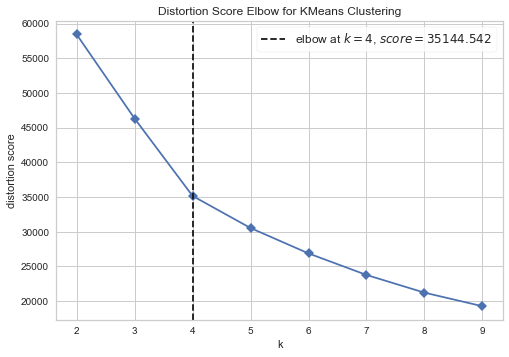

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
model = KMeans(init = 'k-means++')
visualizer = KElbowVisualizer(model, k=(2, 10), timings=False)
visualizer.fit(df0_normalized)
visualizer.show()

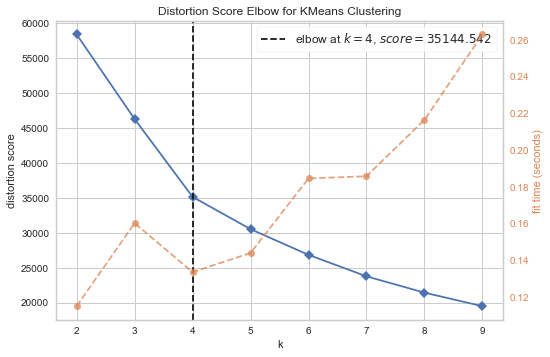

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
# Instantiate the clustering model and visualizer
model = KMeans(init = 'k-means++')
visualizer = KElbowVisualizer(model, k=(2, 10))

# Fit the data to the visualizer
visualizer.fit(df0_normalized)
# Finalize and render the figure
visualizer.show()

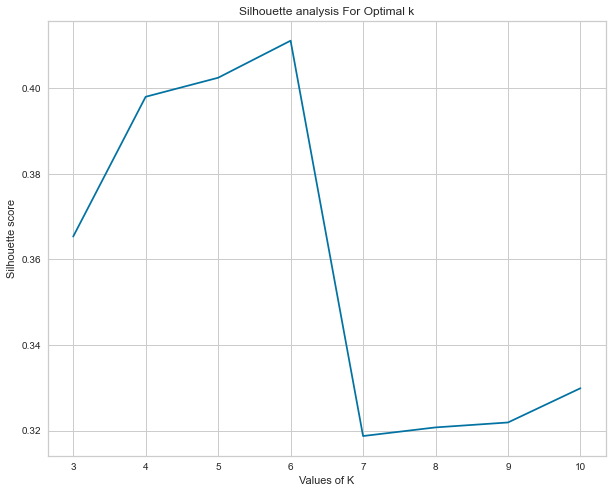

In [67]:
range_n_clusters = [ 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=  i,init = 'k-means++')
    kmeans.fit(df0_normalized)
    cluster_labels = kmeans.labels_
 
   # silhouette score
    silhouette_avg.append(silhouette_score(df0_normalized, cluster_labels))
    
plt.figure(figsize = (10,8))    
plt.plot(range_n_clusters,silhouette_avg, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

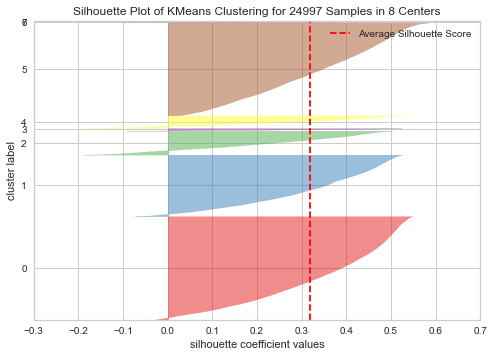

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 24997 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [62]:
model = KMeans(init = 'k-means++')
visualizer = SilhouetteVisualizer(model, k=(3, 8))
visualizer.fit(df0_normalized)
visualizer.show()

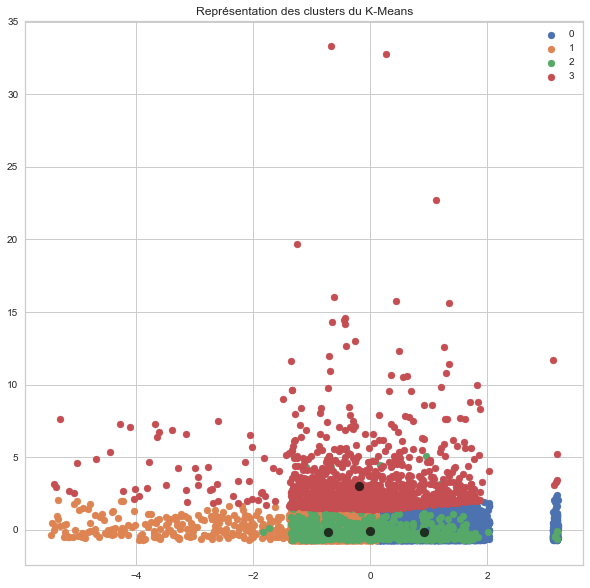

In [241]:
km_df0 = KMeans(n_clusters=4)

# Prediction
label = km_df0.fit_predict(df0_normalized)
centroids = km_df0.cluster_centers_
u_labels = np.unique(label)
cluster_df0_labels = label

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df0_normalized[label==i, 0], df0_normalized[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

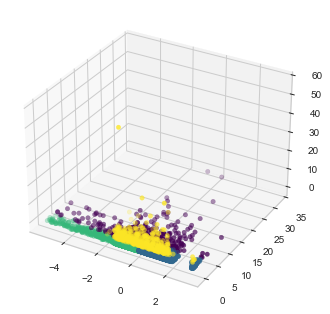

In [85]:
from mpl_toolkits.mplot3d import Axes3D
#df0_stability
x=df0_normalized[:,0]
y=df0_normalized[:,1]
z=df0_normalized[:,2]
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(df0_normalized)
labels = kmeans.predict(df0_normalized)
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ColorsA=plt.cm.viridis(np.linspace(0, 1,4),alpha=0.8)#Equally spaced color 

for i in range(4): #Labels of the clusters 
    xL=[]
    yL=[]
    zL=[]
    for k in range(len(x)):
        if labels[k]==i: #Data points of each cluster 
            xL.append(x[k])
            yL.append(y[k])
            zL.append(z[k])
    ax.scatter(xL,yL,zL,c=ColorsA[i])

In [173]:
# Segmenter la base B0 avec cluster C0 
c0_cluster = KMeans(n_clusters=4)
c0_cluster.fit(df0_normalized)

KMeans(n_clusters=4)

In [205]:
# Segmenter la base B1 avec le clustering respectif C1
b0_by_c0 = c0_cluster.predict(df0_normalized)

### df1 qui prend en compte df0 + 1 mois 2017_11( de 2016. 10 à 2017.11)



In [86]:
df1 = df[df['order_purchase_timestamp'] < '2017-11-30 09:44:50']


In [87]:
df1_stability = pd.DataFrame()
df1_stability["Recency"] = df1["Recency"]
df1_stability["Frequency"] = df1["Frequency"]
df1_stability["MonetaryValue"] = df1["MonetaryValue"]
#df1_stability["days_before_delivered"] = df1["days_before_delivered"]
#df1_stability["days_before_delivered_estimation"] = df1["days_before_delivered_estimation"]
#df1_stability["product_category_name"] = df1["product_category_name_english"]
#df1_stability["customer_city"] = df1["customer_city"]
#df1_stability["review_score"] = df1["review_score"]
df1_stability.shape

(35639, 3)

In [88]:
#df1_normalized = preprocessor.fit_transform(df1_stability)
scaler = StandardScaler()
scaler.fit(df1_stability)
df1_normalized = scaler.transform(df1_stability)

In [174]:
c1_cluster = KMeans(n_clusters=4)
c1_cluster.fit(df1_normalized)

KMeans(n_clusters=4)

In [185]:
# Segmenter la base B1 avec cluster C0 
b1_by_c0 = c0_cluster.predict(df1_normalized)
b1_by_c0

array([0, 2, 2, ..., 3, 0, 0], dtype=int32)

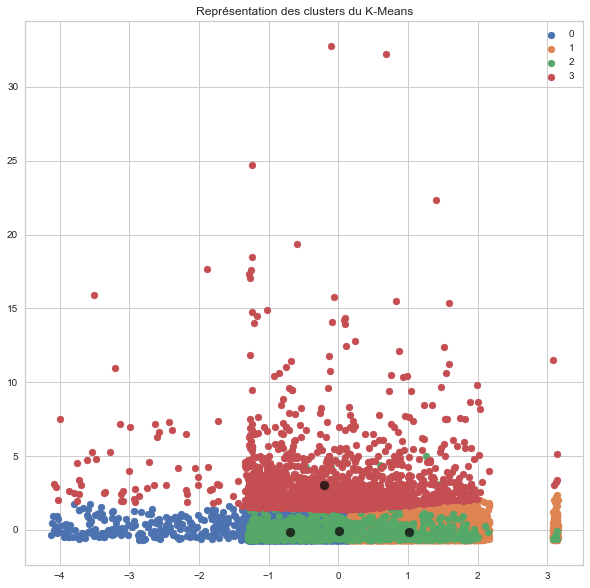

In [218]:
# Prediction
label = km_df0.fit_predict(df1_normalized)
centroids = km_df0.cluster_centers_
u_labels = np.unique(label)
cluster_df1_labels = label

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df1_normalized[label==i, 0], df1_normalized[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

In [195]:
# Segmenter la base B1 avec le clustering respectif C1
b1_by_c1 = c1_cluster.predict(df1_normalized)

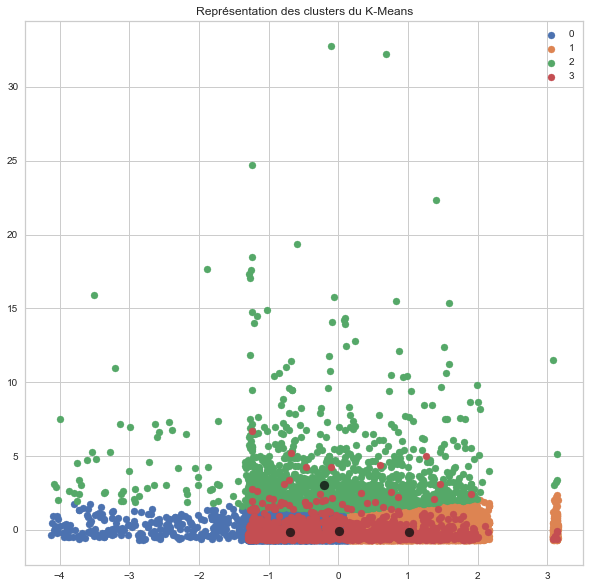

In [215]:
km_df1 = KMeans(n_clusters=4)

# Prediction
label = km_df1.fit_predict(df1_normalized)
centroids = km_df1.cluster_centers_
u_labels = np.unique(label)

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df1_normalized[label==i, 0], df1_normalized[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

###  df2 qui prend en compte df1 + 1 mois 2017_12 ( de 2016. 10 à 2017.12)

In [91]:
df2 = df[df['order_purchase_timestamp'] < '2017-12-30 09:44:50']

In [92]:
df2_stability = pd.DataFrame()
df2_stability["Recency"] = df2["Recency"]
df2_stability["Frequency"] = df2["Frequency"]
df2_stability["MonetaryValue"] = df2["MonetaryValue"]
#df2_stability["days_before_delivered"] = df2["days_before_delivered"]
#df2_stability["days_before_delivered_estimation"] = df2["days_before_delivered_estimation"]
#df2_stability["product_category_name"] = df2["product_category_name_english"]
#df2_stability["customer_city"] = df2["customer_city"]
#df2_stability["review_score"] = df2["review_score"]
df2_stability.shape

(40890, 3)

In [93]:
#df2_normalized = preprocessor.fit_transform(df2_stability)

In [94]:
scaler = StandardScaler()
scaler.fit(df2_stability)
df2_normalized = scaler.transform(df2_stability)

In [175]:
c2_cluster = KMeans(n_clusters=4)
c2_cluster.fit(df2_normalized)

KMeans(n_clusters=4)

In [186]:
# Segmenter la base B2 avec cluster C0 
b2_by_c0 = c0_cluster.predict(df2_normalized)

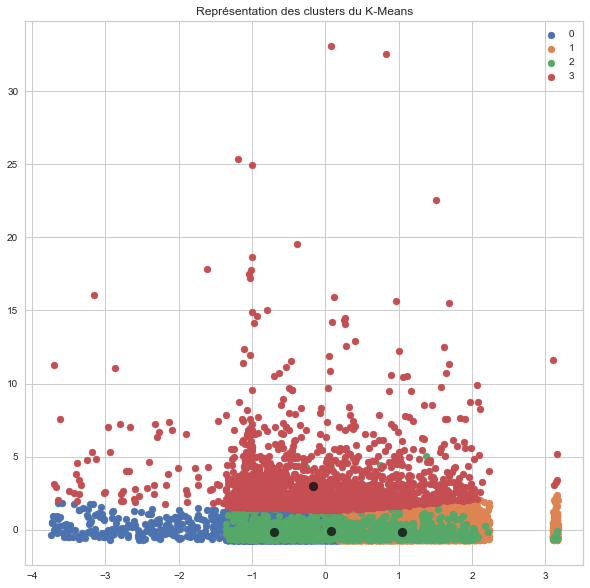

In [219]:
# Prediction
label = km_df0.fit_predict(df2_normalized)
centroids = km_df0.cluster_centers_
u_labels = np.unique(label)
cluster_df2_labels = label

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df2_normalized[label==i, 0], df2_normalized[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

In [196]:
# Segmenter la base B2 avec le clustering respectif C2
b2_by_c2 = c2_cluster.predict(df2_normalized)

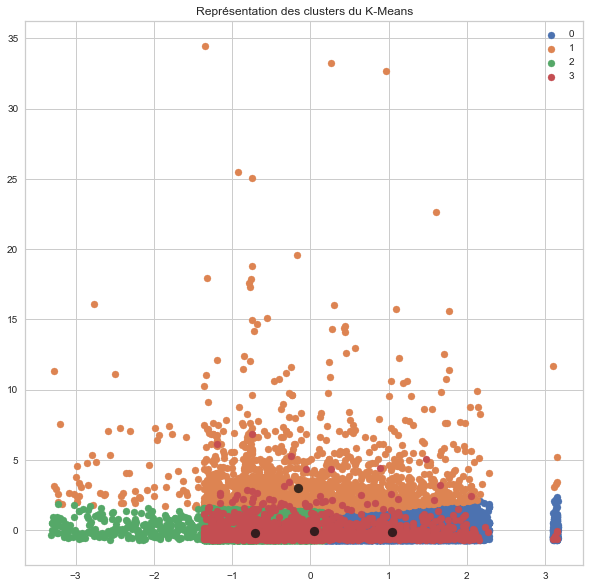

In [220]:
km_df2 = KMeans(n_clusters=4, random_state=42)

# Prediction
label = km_df2.fit_predict(df3_normalized)
centroids = km_df2.cluster_centers_
u_labels = np.unique(label)

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df3_normalized[label==i, 0], df3_normalized[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

### df3 qui prend en compte df2 + 1 mois 2018_01( de 2016. 10 à 2018.01)

In [41]:

df3 = df[df['order_purchase_timestamp'] < '2018-01-30 09:44:50']


In [99]:
df3_stability = pd.DataFrame()
df3_stability["Recency"] = df3["Recency"]
df3_stability["Frequency"] = df3["Frequency"]
df3_stability["MonetaryValue"] = df3["MonetaryValue"]
#df3_stability["days_before_delivered"] = df3["days_before_delivered"]
#df3_stability["days_before_delivered_estimation"] = df3["days_before_delivered_estimation"]
#df3_stability["product_category_name"] = df3["product_category_name_english"]
#df3_stability["customer_city"] = df3["customer_city"]
#df3_stability["review_score"] = df3["review_score"]
df3_stability.shape

(47207, 3)

In [100]:
#df3_normalized = preprocessor.fit_transform(df3_stability)
scaler = StandardScaler()
scaler.fit(df3_stability)
df3_normalized = scaler.transform(df3_stability)

In [176]:
c3_cluster = KMeans(n_clusters=4)
c3_cluster.fit(df3_normalized)

KMeans(n_clusters=4)

In [187]:
# Segmenter la base B3 avec cluster C0 
b3_by_c0 = c0_cluster.predict(df3_normalized)

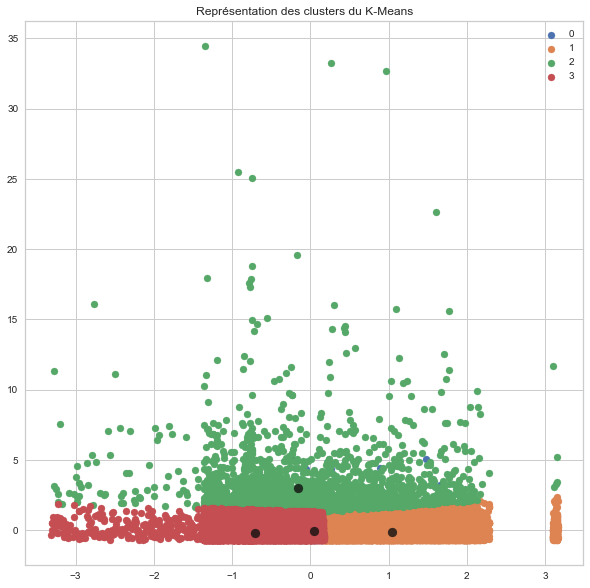

In [221]:
# Prediction
label = km_df0.fit_predict(df3_normalized)
centroids = km_df0.cluster_centers_
cluster_df3_labels = label
u_labels = np.unique(label)

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df3_normalized[label==i, 0], df3_normalized[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

In [197]:
# Segmenter la base B3 avec le clustering respectif C3
b3_by_c3 = c3_cluster.predict(df3_normalized)

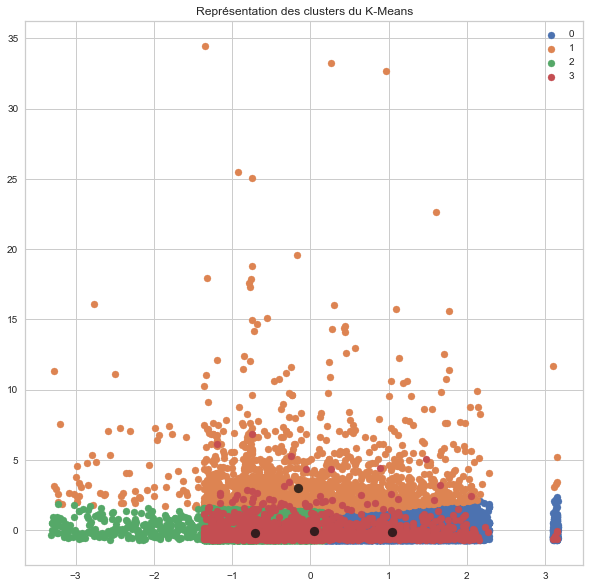

In [153]:
km_df3 = KMeans(n_clusters=4, random_state=42)

# Prediction
label = km_df3.fit_predict(df3_normalized)
centroids = km_df3.cluster_centers_
u_labels = np.unique(label)

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df3_normalized[label==i, 0], df3_normalized[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

### df4 qui prend en compte df3 + 1 mois 2018_02( de 2016. 10 à 2018.02)

In [103]:
df4 = df[df['order_purchase_timestamp'] < '2018-02-28 09:44:50']

In [104]:
df4_stability = pd.DataFrame()
df4_stability["Recency"] = df4["Recency"]
df4_stability["Frequency"] = df4["Frequency"]
df4_stability["MonetaryValue"] = df4["MonetaryValue"]
#df4_stability["days_before_delivered"] = df4["days_before_delivered"]
#df4_stability["days_before_delivered_estimation"] = df4["days_before_delivered_estimation"]
#df4_stability["product_category_name"] = df4["product_category_name_english"]
#df4_stability["customer_city"] = df4["customer_city"]
#df4_stability["review_score"] = df4["review_score"]
df4_stability.shape

(53542, 3)

In [107]:
#df4_normalized = preprocessor.fit_transform(df4_stability)
scaler = StandardScaler()
scaler.fit(df4_stability)
df4_normalized = scaler.transform(df4_stability)

In [177]:
c4_cluster = KMeans(n_clusters=4)
c4_cluster.fit(df4_normalized)

KMeans(n_clusters=4)

In [188]:
# Segmenter la base B4 avec cluster C0 
b4_by_c0 = c0_cluster.predict(df4_normalized)

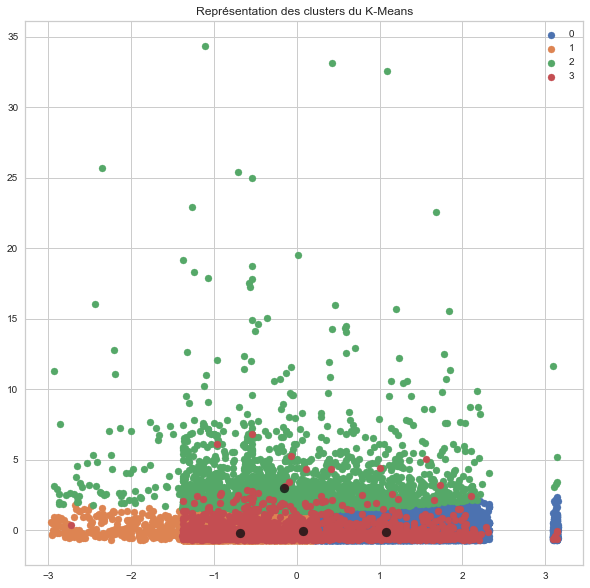

In [222]:
# Prediction
label = km_df0.fit_predict(df4_normalized)
centroids = km_df0.cluster_centers_
cluster_df4_labels = label
u_labels = np.unique(label)

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df4_normalized[label==i, 0], df4_normalized[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

In [223]:
# Segmenter la base B4 avec le clustering respectif C4
b4_by_c4 = c4_cluster.predict(df4_normalized)

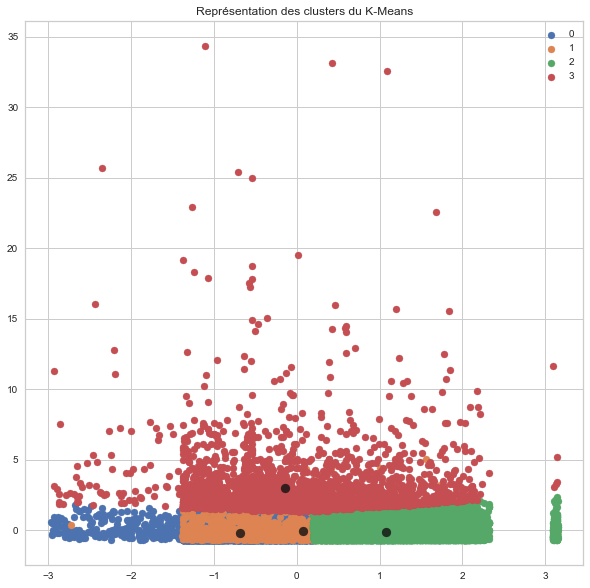

In [224]:
km_df4 = KMeans(n_clusters=4, random_state=42)

# Prediction
label = km_df4.fit_predict(df4_normalized)
centroids = km_df4.cluster_centers_
u_labels = np.unique(label)

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df4_normalized[label==i, 0], df4_normalized[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

### df5 qui prend en compte df4 + 1 mois 2018_03( de 2016. 10 à 2018.03)

In [118]:

df5 = df[df['order_purchase_timestamp'] < '2018-03-30 09:44:50']

In [119]:
df5_stability = pd.DataFrame()
df5_stability["Recency"] = df5["Recency"]
df5_stability["Frequency"] = df5["Frequency"]
df5_stability["MonetaryValue"] = df5["MonetaryValue"]
#df5_stability["days_before_delivered"] = df5["days_before_delivered"]
#df5_stability["days_before_delivered_estimation"] = df5["days_before_delivered_estimation"]
#df5_stability["product_category_name"] = df5["product_category_name_english"]
#df5_stability["customer_city"] = df5["customer_city"]
#df5_stability["review_score"] = df5["review_score"]
df5_stability.shape

(60148, 3)

In [120]:
#df5_normalized = preprocessor.fit_transform(df5_stability)
scaler = StandardScaler()
scaler.fit(df5_stability)
df5_normalized = scaler.transform(df5_stability)

In [178]:
c5_cluster = KMeans(n_clusters=4)
c5_cluster.fit(df5_normalized)

KMeans(n_clusters=4)

In [189]:
# Segmenter la base B5 avec cluster C0 
b5_by_c0 = c0_cluster.predict(df5_normalized)

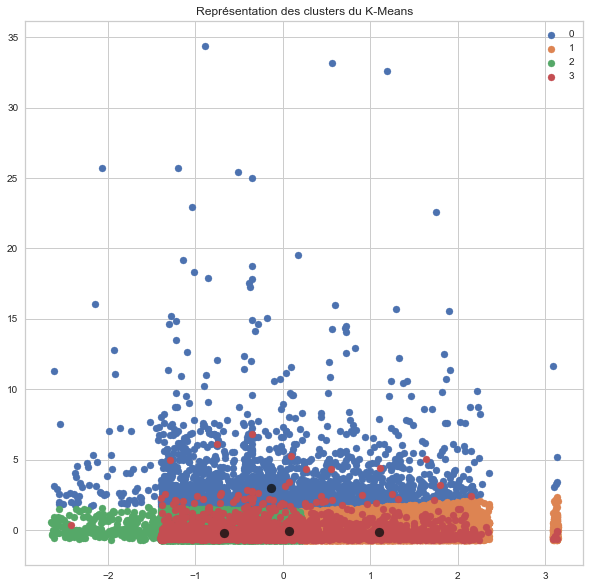

In [225]:
# Prediction
label = km_df0.fit_predict(df5_normalized)
centroids = km_df0.cluster_centers_
u_labels = np.unique(label)
cluster_df5_labels = label

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df5_normalized[label==i, 0], df5_normalized[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

In [199]:
# Segmenter la base B5 avec le clustering respectif C5
b5_by_c5 = c5_cluster.predict(df5_normalized)

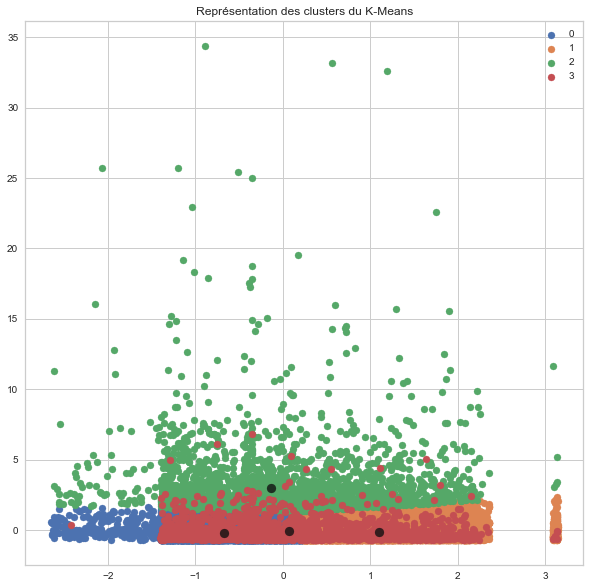

In [226]:
km_df5 = KMeans(n_clusters=4, random_state=42)

# Prediction
label = km_df5.fit_predict(df5_normalized)
centroids = km_df5.cluster_centers_
u_labels = np.unique(label)


# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df5_normalized[label==i, 0], df5_normalized[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

### df6 qui prend en compte df5 + 1 mois 2018_04 ( de 2016. 10 à 2018.04)

In [122]:
df6 = df[df['order_purchase_timestamp'] < '2018-04-30 09:44:50']

In [123]:
df6_stability = pd.DataFrame()
df6_stability["Recency"] = df6["Recency"]
df6_stability["Frequency"] = df6["Frequency"]
df6_stability["MonetaryValue"] = df6["MonetaryValue"]
#df6_stability["days_before_delivered"] = df6["days_before_delivered"]
#df6_stability["days_before_delivered_estimation"] = df6["days_before_delivered_estimation"]
#df6_stability["product_category_name"] = df6["product_category_name_english"]
#df6_stability["customer_city"] = df6["customer_city"]
#df6_stability["review_score"] = df6["review_score"]
df6_stability.shape

(66750, 3)

In [124]:
#df6_normalized = preprocessor.fit_transform(df6_stability)
scaler = StandardScaler()
scaler.fit(df6_stability)
df6_normalized = scaler.transform(df6_stability)

In [179]:
c6_cluster = KMeans(n_clusters=4)
c6_cluster.fit(df6_normalized)

KMeans(n_clusters=4)

In [190]:
# Segmenter la base B6 avec cluster C0 
b6_by_c0 = c0_cluster.predict(df6_normalized)

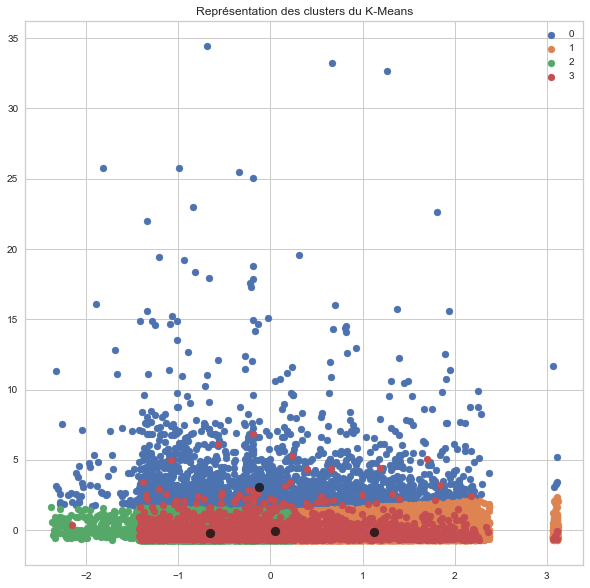

In [227]:
# Prediction
label = km_df0.fit_predict(df6_normalized)
centroids = km_df0.cluster_centers_
u_labels = np.unique(label)
cluster_df6_labels = label

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df6_normalized[label==i, 0], df6_normalized[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

In [200]:
# Segmenter la base B6 avec le clustering respectif C6
b6_by_c6 = c6_cluster.predict(df6_normalized)

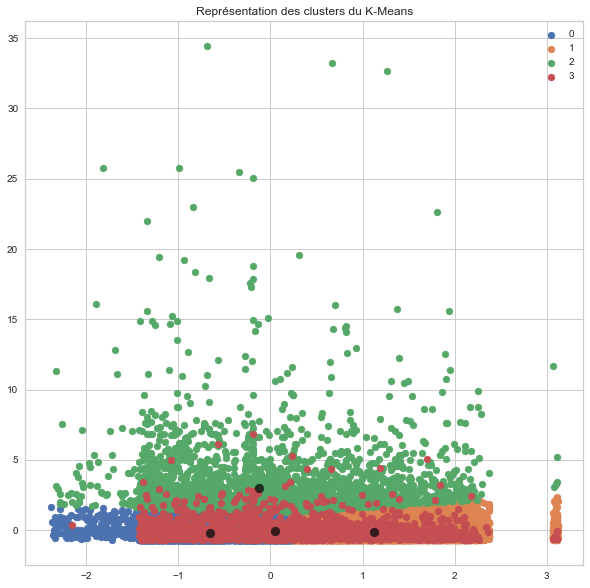

In [228]:
km_df6 = KMeans(n_clusters=4, random_state=42)

# Prediction
label = km_df6.fit_predict(df6_normalized)
centroids = km_df6.cluster_centers_
u_labels = np.unique(label)


# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df6_normalized[label==i, 0], df6_normalized[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

### df7 qui prend en compte df6 + 1 mois 2018_05( de 2016. 10 à 2018.05)

In [126]:

df7 = df[df['order_purchase_timestamp'] < '2018-05-30 09:44:50']

In [127]:
df7_stability = pd.DataFrame()
df7_stability["Recency"] = df7["Recency"]
df7_stability["Frequency"] = df7["Frequency"]
df7_stability["MonetaryValue"] = df7["MonetaryValue"]
#df7_stability["days_before_delivered"] = df7["days_before_delivered"]
#df7_stability["days_before_delivered_estimation"] = df7["days_before_delivered_estimation"]
#df7_stability["product_category_name"] = df7["product_category_name_english"]
#df7_stability["customer_city"] = df7["customer_city"]
#df7_stability["review_score"] = df7["review_score"]
df7_stability.shape

(73224, 3)

In [128]:
#df7_normalized = preprocessor.fit_transform(df7_stability)
scaler = StandardScaler()
scaler.fit(df7_stability)
df7_normalized = scaler.transform(df7_stability)

In [180]:
c7_cluster = KMeans(n_clusters=4)
c7_cluster.fit(df7_normalized)

KMeans(n_clusters=4)

In [191]:
# Segmenter la base B7 avec cluster C0 
b7_by_c0 = c0_cluster.predict(df7_normalized)

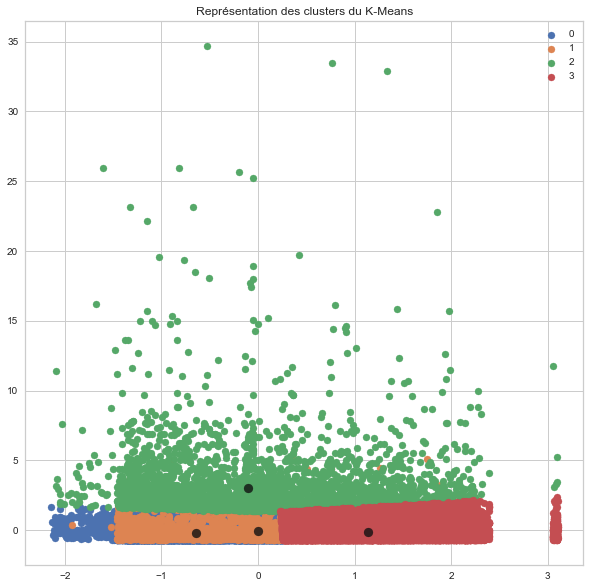

In [230]:
# Prediction
label = km_df0.fit_predict(df7_normalized)
centroids = km_df0.cluster_centers_
u_labels = np.unique(label)
cluster_df7_labels = label

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df7_normalized[label==i, 0], df7_normalized[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

In [201]:
# Segmenter la base B7 avec le clustering respectif C7
b7_by_c7 = c7_cluster.predict(df7_normalized)

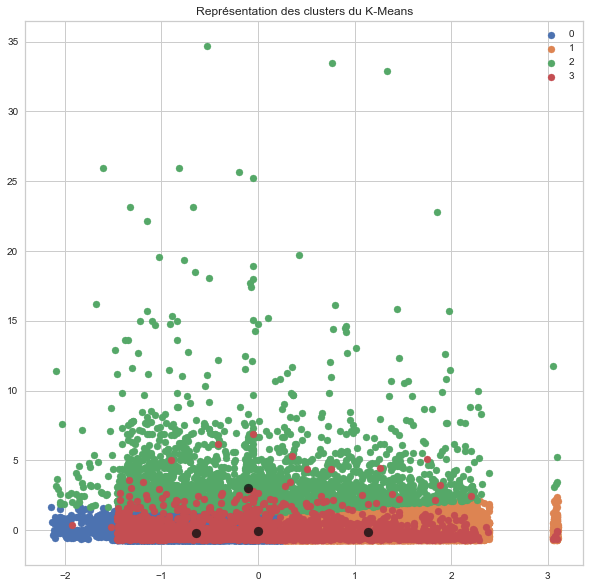

In [229]:
km_df7 = KMeans(n_clusters=4, random_state=42)

# Prediction
label = km_df7.fit_predict(df7_normalized)
centroids = km_df7.cluster_centers_
u_labels = np.unique(label)

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df7_normalized[label==i, 0], df7_normalized[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

### df8 qui prend en compte df7 + 1 mois 2018_06( de 2016. 10 à 2018.06)

In [130]:

df8 = df[df['order_purchase_timestamp'] < '2018-06-30 09:44:50']

In [131]:
df8_stability = pd.DataFrame()
df8_stability["Recency"] = df8["Recency"]
df8_stability["Frequency"] = df8["Frequency"]
df8_stability["MonetaryValue"] = df8["MonetaryValue"]
#df8_stability["days_before_delivered"] = df8["days_before_delivered"]
#df8_stability["days_before_delivered_estimation"] = df8["days_before_delivered_estimation"]
#df8_stability["product_category_name"] = df8["product_category_name_english"]
#df8_stability["customer_city"] = df8["customer_city"]
#df8_stability["review_score"] = df8["review_score"]
df8_stability.shape

(79267, 3)

In [132]:
#df8_normalized = preprocessor.fit_transform(df8_stability)
scaler = StandardScaler()
scaler.fit(df8_stability)
df8_normalized = scaler.transform(df8_stability)

In [181]:
c8_cluster = KMeans(n_clusters=4)
c8_cluster.fit(df8_normalized)

KMeans(n_clusters=4)

In [192]:
# Segmenter B8 avec cluster C0 
b8_by_c0 = c0_cluster.predict(df8_normalized)

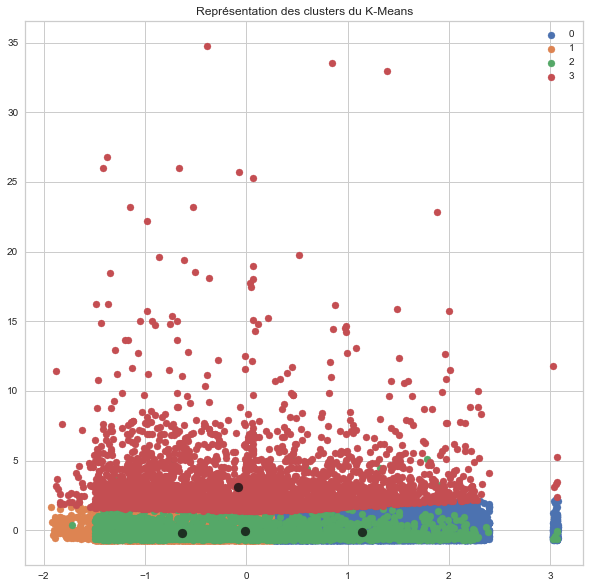

In [231]:
# Prediction
label = km_df0.fit_predict(df8_normalized)
centroids = km_df0.cluster_centers_
u_labels = np.unique(label)
cluster_df8_labels = label

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df8_normalized[label==i, 0], df8_normalized[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

In [202]:
# Segmenter la base B8 avec le clustering respectif C8
b8_by_c8 = c8_cluster.predict(df8_normalized)

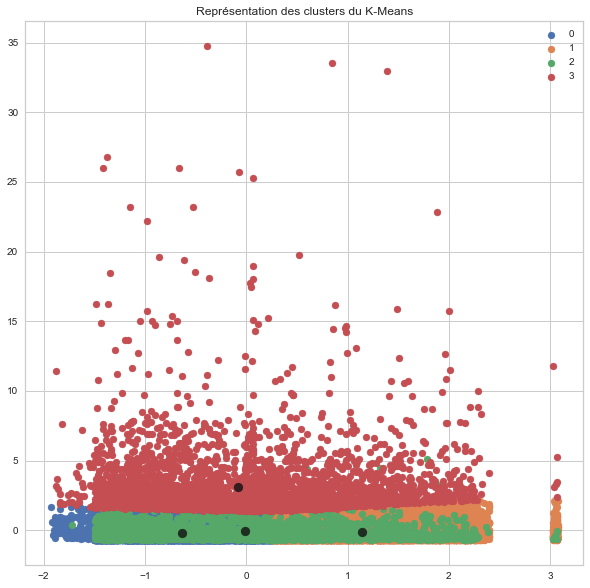

In [232]:
km_df8 = KMeans(n_clusters=4, random_state=42)

# Prediction
label = km_df8.fit_predict(df8_normalized)
centroids = km_df8.cluster_centers_
u_labels = np.unique(label)


# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df8_normalized[label==i, 0], df8_normalized[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

### df9 qui prend en compte df8 + 1 mois 2018_07( de 2016. 10 à 2018.07)

In [134]:

df9 = df[df['order_purchase_timestamp'] < '2018-07-30 09:44:50']

In [135]:
df9_stability = pd.DataFrame()
df9_stability["Recency"] = df9["Recency"]
df9_stability["Frequency"] = df9["Frequency"]
df9_stability["MonetaryValue"] = df9["MonetaryValue"]
#df9_stability["days_before_delivered"] = df9["days_before_delivered"]
#df9_stability["days_before_delivered_estimation"] = df9["days_before_delivered_estimation"]
#df9_stability["product_category_name"] = df9["product_category_name_english"]
#df9_stability["customer_city"] = df9["customer_city"]
#df9_stability["review_score"] = df9["review_score"]
df9_stability.shape

(84745, 3)

In [136]:
#df9_normalized = preprocessor.fit_transform(df9_stability)
scaler = StandardScaler()
scaler.fit(df9_stability)
df9_normalized = scaler.transform(df9_stability)

In [182]:
c9_cluster = KMeans(n_clusters=4)
c9_cluster.fit(df9_normalized)

KMeans(n_clusters=4)

In [193]:
# Segmenter B9 avec C0 
b9_by_c0 = c0_cluster.predict(df9_normalized)

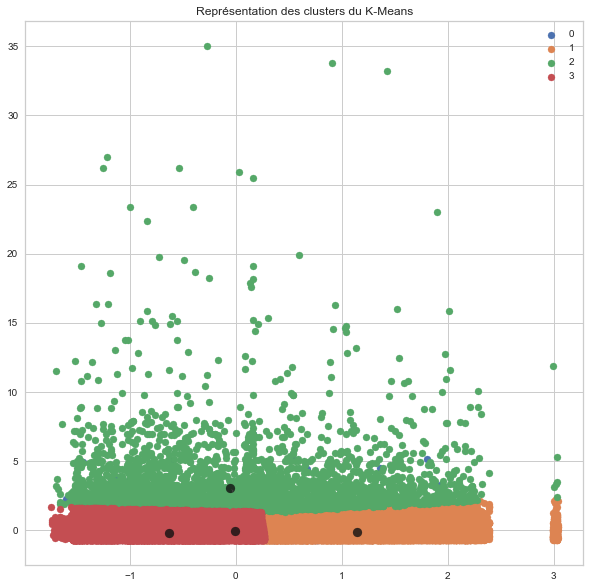

In [234]:
# Prediction
label = km_df0.fit_predict(df9_normalized)
centroids = km_df0.cluster_centers_
u_labels = np.unique(label)
cluster_df9_labels = label

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df9_normalized[label==i, 0], df9_normalized[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

In [203]:
# Segmenter la base B9 avec le clustering respectif C9
b9_by_c9 = c9_cluster.predict(df9_normalized)

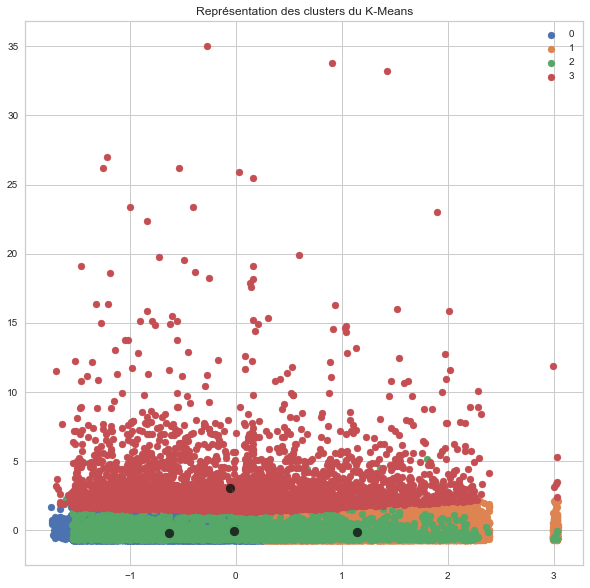

In [233]:
km_df9 = KMeans(n_clusters=4, random_state=42)

# Prediction
label = km_df9.fit_predict(df9_normalized)
centroids = km_df9.cluster_centers_
u_labels = np.unique(label)


# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df9_normalized[label==i, 0], df9_normalized[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

### df10 qui prend en compte df9 + 1 mois 2018.08 ( de 2016. 10 à 2018.08)

In [138]:

df10 = df[df['order_purchase_timestamp'] < '2018-08-29 15:00:37']

In [139]:
df10_stability = pd.DataFrame()
df10_stability["Recency"] = df10["Recency"]
df10_stability["Frequency"] = df10["Frequency"]
df10_stability["MonetaryValue"] = df10["MonetaryValue"]
#df10_stability["days_before_delivered"] = df10["days_before_delivered"]
#df10_stability["days_before_delivered_estimation"] = df10["days_before_delivered_estimation"]
#df10_stability["product_category_name"] = df10["product_category_name_english"]
#df10_stability["customer_city"] = df10["customer_city"]
#df10_stability["review_score"] = df10["review_score"]
df10_stability.shape

(91460, 3)

In [140]:
#df10_normalized = preprocessor.fit_transform(df10_stability)
scaler = StandardScaler()
scaler.fit(df10_stability)
df10_normalized = scaler.transform(df10_stability)

In [183]:
c10_cluster = KMeans(n_clusters=4)
c10_cluster.fit(df10_normalized)

KMeans(n_clusters=4)

In [194]:
# Segmenter B10 avec C0 
b10_by_c0 = c0_cluster.predict(df10_normalized)

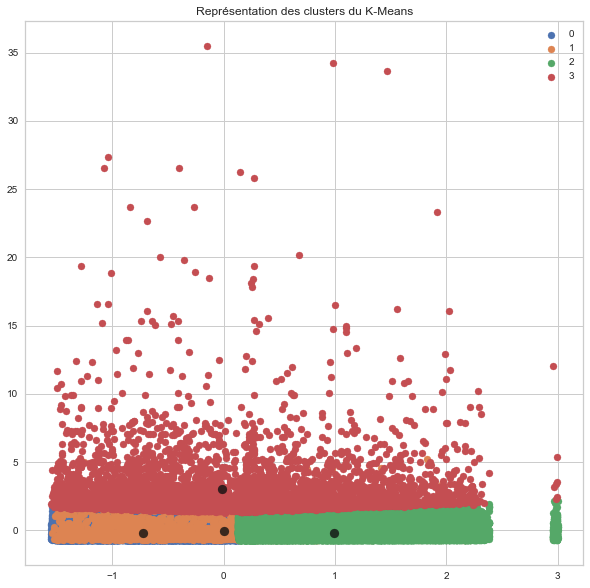

In [236]:
# Prediction
label = km_df0.fit_predict(df10_normalized)
centroids = km_df0.cluster_centers_
u_labels = np.unique(label)
cluster_df10_labels = label

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df10_normalized[label==i, 0], df10_normalized[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

In [204]:
# Segmenter la base B10 avec le clustering respectif C10
b10_by_c10 = c10_cluster.predict(df10_normalized)

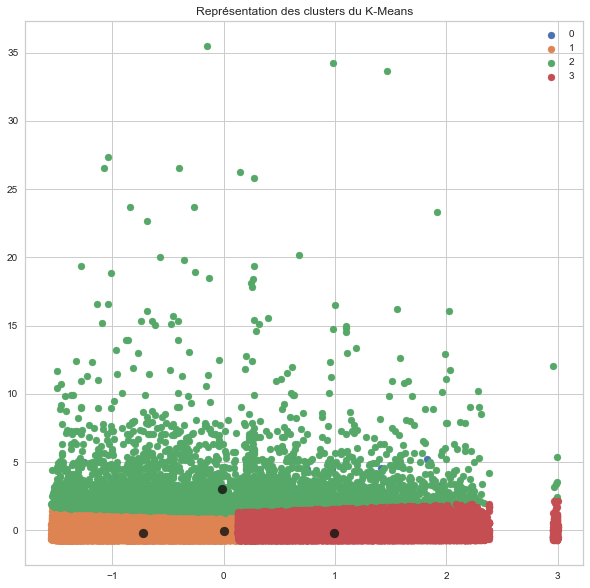

In [235]:
km_df10 = KMeans(n_clusters=4, random_state=42)

# Prediction
label = km_df10.fit_predict(df10_normalized)
centroids = km_df10.cluster_centers_
u_labels = np.unique(label)


# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df10_normalized[label==i, 0], df10_normalized[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

### l'évolution de l'indice de rand

In [305]:
temps = pd.Series(["ARI à 12 mois", "ARI à 13 mois","ARI à 14 mois", "ARI à 15 mois", "ARI à 16 mois", "ARI à 17 mois", "ARI à 18 mois",
                  "ARI à 19 mois", "ARI à 20 mois", "ARI à 21 mois", "ARI à 22 mois"])

ari  = pd.Series([adjusted_rand_score(b0_by_c0, b0_by_c0),
                  adjusted_rand_score(b1_by_c0, b1_by_c1),
                  adjusted_rand_score(b2_by_c0, b2_by_c2),
                  adjusted_rand_score(b3_by_c0, b3_by_c3),
                  adjusted_rand_score(b4_by_c0, b4_by_c4),
                  adjusted_rand_score(b5_by_c0, b5_by_c5),
                  adjusted_rand_score(b6_by_c0, b6_by_c6),
                  adjusted_rand_score(b7_by_c0, b7_by_c7),
                  adjusted_rand_score(b8_by_c0, b8_by_c8),
                  adjusted_rand_score(b9_by_c0, b9_by_c9),
                  adjusted_rand_score(b10_by_c0, b10_by_c10)
                 ])


ARI_values = pd.DataFrame({"ARI par mois": temps, "Indice de rand": ari})
ARI_values

,ARI par mois,Indice de rand
0,ARI à 12 mois,1.000000
1,ARI à 13 mois,0.936466
2,ARI à 14 mois,0.923548
3,ARI à 15 mois,0.938822
4,ARI à 16 mois,0.906692
5,ARI à 17 mois,0.900460
6,ARI à 18 mois,0.881121
7,ARI à 19 mois,0.883310
8,ARI à 20 mois,0.867192
9,ARI à 21 mois,0.771611


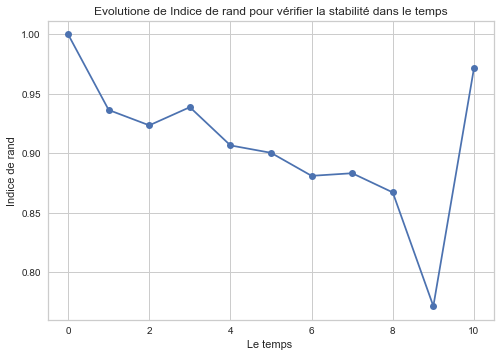

In [306]:
plt.plot(ARI_values['Indice de rand'],  data=ARI_values, linestyle='-', marker='o')
plt.xlabel('Le temps ') 
plt.ylabel('Indice de rand') 
plt.title('Evolutione de Indice de rand pour vérifier la stabilité dans le temps')
plt.show()

Text(0, 0.5, 'La période de temps')

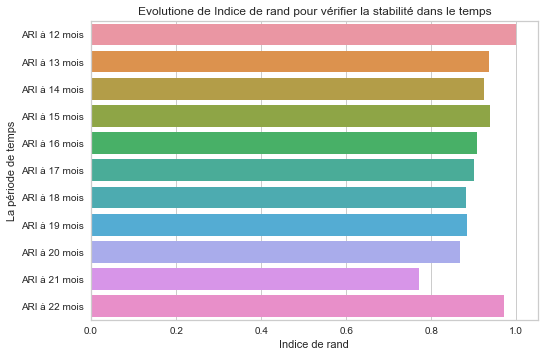

In [307]:
sns.barplot(y=ARI_values['ARI par mois'], x=ARI_values['Indice de rand'])
plt.title('Evolutione de Indice de rand pour vérifier la stabilité dans le temps')
plt.xlabel('Indice de rand')
plt.ylabel("La période de temps")

Au bout de 8 mois, on remarque que notre segmentation changé très peu. En comparant ARI de 12mois et 22 mois on voit que après 8 mois  notre segmentation est un peu près pareil (ARI un peu près de 1) Il peut être envisagé de faire une maintenance de l'algorithme tous les ans si cette solution est adoptée.